In [68]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [69]:
pltWidth, pltHeight = 20, 10
plt.rcParams['figure.figsize'] = (pltWidth, pltHeight)

In [56]:
url = "https://en.wikipedia.org/wiki/List_of_costliest_Atlantic_hurricanes"
html_string = requests.get(url).content

In [57]:
soup = BeautifulSoup(html_string, 'html.parser')
table = soup.find('table')

In [58]:
columns = ['Name', 'Damage in Billions USD', 'Season',
           'Storm classification at peak intensity']

num_rows = len(table.find_all('tr'))
hurricaneDf = pd.DataFrame(columns=range(4), index=range(num_rows-1))

for row_marker, row in enumerate(table.find_all('tr')[1:]):
    Name = row.find('th').text
    hurricaneDf.iat[row_marker, 0] = Name

    for column_marker, column in enumerate(row.find_all('td')[:3]):
        if column_marker != 1:
            hurricaneDf.iat[row_marker, column_marker+1] = column.find('span', class_='sorttext').text
        else:
            hurricaneDf.iat[row_marker, column_marker+1] = column.find('a').text

hurricaneDf.columns = columns

In [72]:
hurricaneDf['Season'] = hurricaneDf['Season'].apply(lambda x: int(x))
hurricaneDf['Damage in Billions USD'] = hurricaneDf['Damage in Billions USD'].apply(lambda x: float(x[1:]))

In [73]:
hurricaneDf

,Name,Damage in Billions USD,Season,Storm classification at peak intensity
0,Katrina,125.00,2005,Category 5 hurricane
1,Harvey,125.00,2017,Category 4 hurricane
2,Maria,91.60,2017,Category 5 hurricane
3,Sandy,68.70,2012,Category 3 hurricane
4,Irma,64.80,2017,Category 5 hurricane
5,Ike,38.00,2008,Category 4 hurricane
6,Wilma,27.40,2005,Category 5 hurricane
7,Andrew,27.30,1992,Category 5 hurricane
8,Ivan,26.10,2004,Category 5 hurricane
9,Rita,18.50,2005,Category 5 hurricane


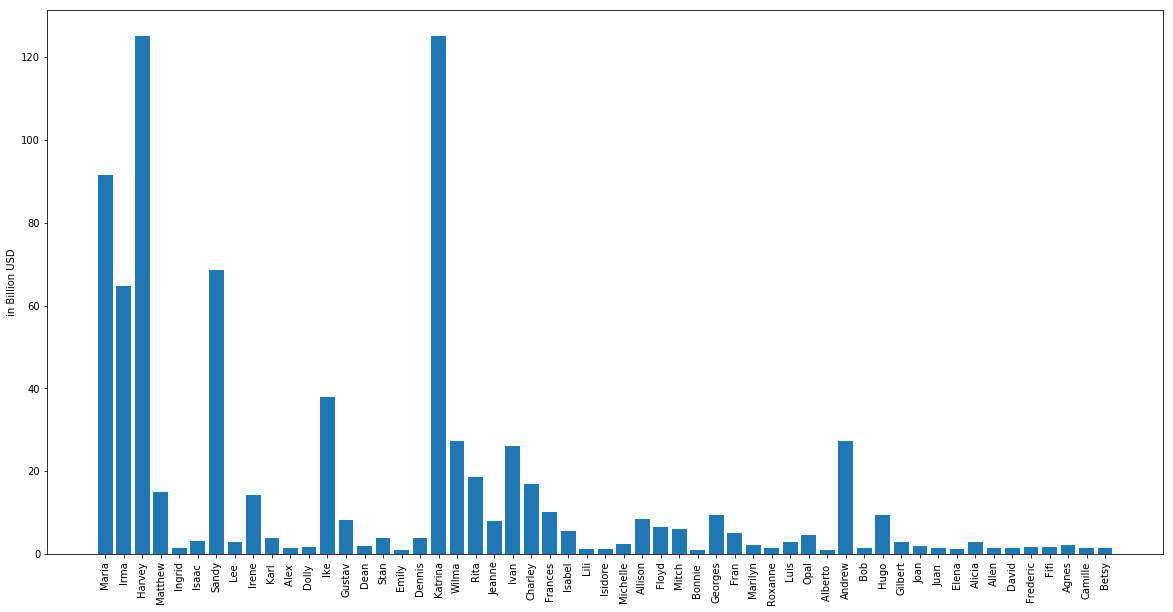

In [75]:
hurricane = hurricaneDf.sort_values(ascending=False, by='Season')
plt.bar(range(hurricane.shape[0]), hurricane['Damage in Billions USD'])
plt.xticks(range(hurricane.shape[0]), hurricane['Name'], rotation=90)
plt.ylabel('in Billion USD')

plt.show()

In [76]:
Name = hurricaneDf['Name'].tolist()
Season = hurricaneDf['Season'].tolist()

In [80]:
List = zip(Name, Season)
[print(x) for x in List];

('Katrina', 2005)
('Harvey', 2017)
('Maria', 2017)
('Sandy', 2012)
('Irma', 2017)
('Ike', 2008)
('Wilma', 2005)
('Andrew', 1992)
('Ivan', 2004)
('Rita', 2005)
('Charley', 2004)
('Matthew', 2016)
('Irene', 2011)
('Frances', 2004)
('Hugo', 1989)
('Georges', 1998)
('Allison', 2001)
('Gustav', 2008)
('Jeanne', 2004)
('Floyd', 1999)
('Mitch', 1998)
('Isabel', 2003)
('Fran', 1996)
('Opal', 1995)
('Stan', 2005)
('Karl ', 2010)
('Dennis', 2005)
('Isaac ', 2012)
('Alicia', 1983)
('Gilbert', 1988)
('Luis', 1995)
('Lee ', 2011)
('Michelle', 2001)
('Marilyn', 1995)
('Agnes', 1972)
('Dean', 2007)
('Joan', 1988)
('Fifi', 1974)
('Frederic', 1979)
('Dolly ', 2008)
('Allen', 1980)
('David', 1979)
('Alex ', 2010)
('Juan ', 1985)
('Bob', 1991)
('Roxanne', 1995)
('Ingrid', 2013)
('Betsy', 1965)
('Camille', 1969)
('Elena', 1985)
('Isidore', 2002)
('Lili', 2002)
('Alberto ', 1994)
('Emily ', 2005)
('Bonnie ', 1998)
